# Review of exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fileName = "../data/shortRaw.npy" # binder users or people with a local git repository
dat = np.load(fileName)

* How many dimensions does the data have?
* What is the size of the array in each dimension?
* What is the data type or dtype (integer, float, etc.) of the `dat` array?
* Which dimension represents the recording channels and the recording samples?

In [2]:
print("ndim:",dat.ndim)
print("shape:",dat.shape)
print("dtype:",dat.dtype)

ndim: 2
shape: (8, 20000)
dtype: int16


* Plot the data for the first recording channel.
* Do you seen any oscillatory patterns in the data? If so at which frequency? 
* Plot the data for 2 recording channels. 
* What is similar or different between the different channels?

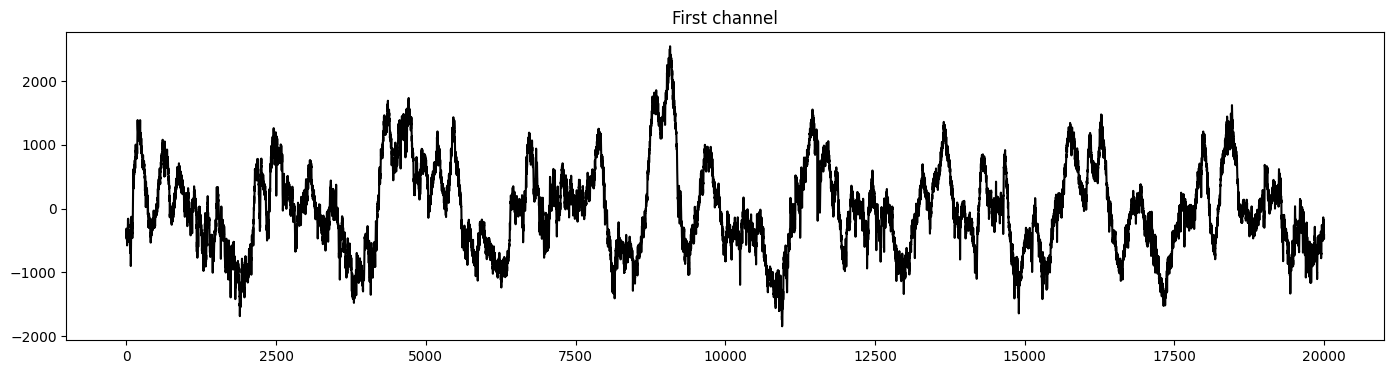

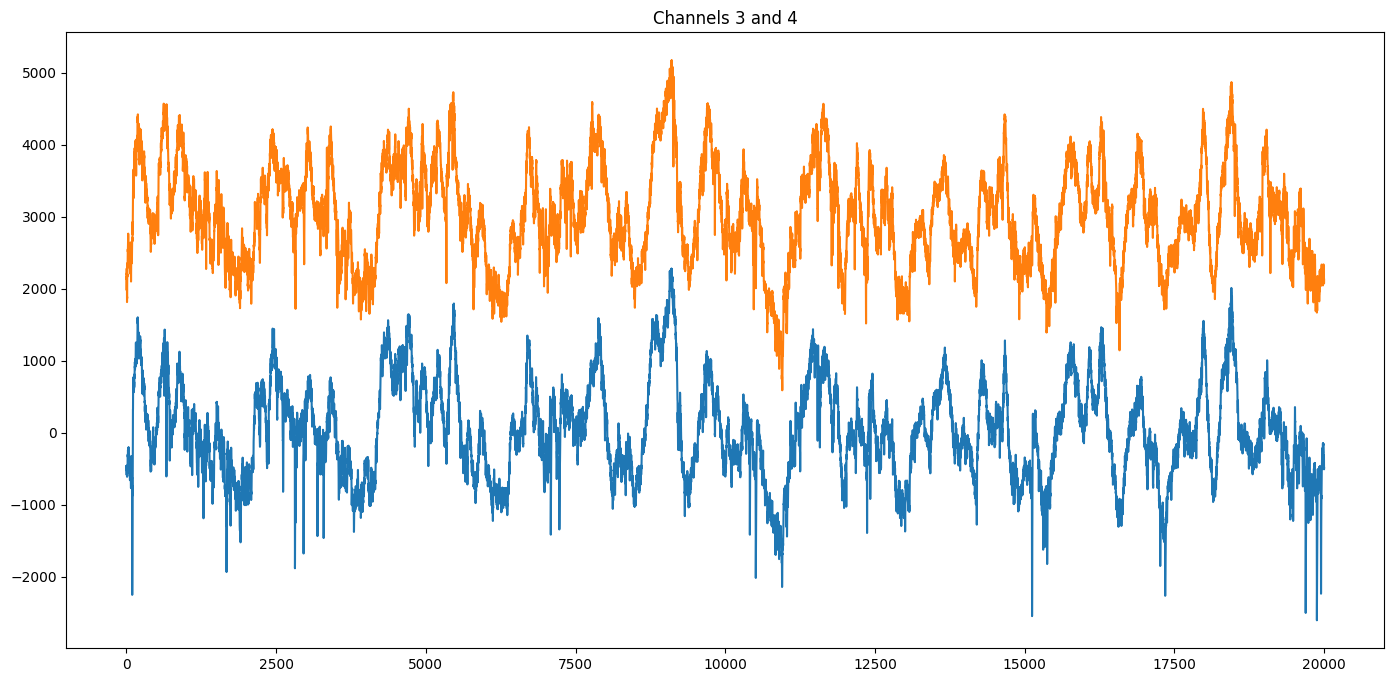

In [3]:
# plot the first channel
plt.figure(figsize=(17,4))
plt.plot(dat[0,:],c="black")
plt.title("First channel")
plt.show()

# plot 2 channels
plt.figure(figsize=(17,8))
plt.plot(dat[3,:])
plt.plot(dat[4,:]+3000) # I added 3000 to the values of channel 4 to be able to see it.
plt.title("Channels 3 and 4")
plt.show()

* What is the mean value in the `dat` array?
* What is the mean value per channel of the `dat` array?

In [4]:
print("The mean of dat is :",dat.mean())
print("Mean per channel:")
print(dat.mean(axis=1))

The mean of dat is : 3.06385
Mean per channel:
[ -9.30035  18.965   -14.9138   28.8605   16.56955  29.91675 -33.8044
 -11.78245]


* Can you plot the mean value across channels for all samples? The plot should have 20000 values.


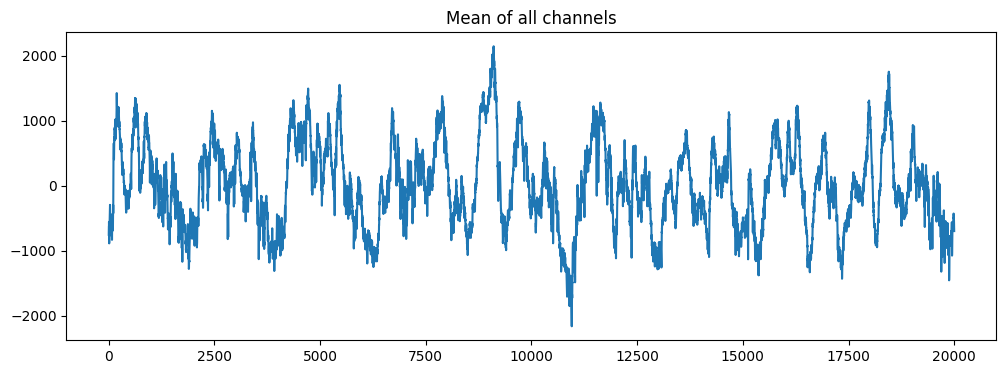

In [5]:
plt.figure(figsize=(12,4))
plt.plot(dat.mean(axis=0))
plt.title("Mean of all channels")
plt.show()

* How could I add 100 to all values in the array?

In [8]:
newDat = dat+100

-"I hate the idea of broadcasting. Can I do this with a for loops?"

-"Sure, but it will be longer to code."

In [9]:
newDatFor = np.empty_like(dat) # create an empty array for the results
for i in range(dat.shape[0]):
    for j in range(dat.shape[1]):
        newDatFor[i,j] = dat[i,j]+100

Test if the two approaches give the same results.

In [10]:
np.array_equal(newDat,newDatFor)

True

Let's see which approach (broadcasting Vs. for loops) is the fastest.

In [11]:
%%time
newDat = dat+100

CPU times: user 564 µs, sys: 421 µs, total: 985 µs
Wall time: 1.21 ms


In [12]:
%%time
newDat = np.empty_like(dat) # create an empty array for the results
for i in range(dat.shape[0]):
    for j in range(dat.shape[1]):
        newDat[i,j] = dat[i,j]+100

CPU times: user 145 ms, sys: 0 ns, total: 145 ms
Wall time: 145 ms


In this case, broadcasting is approximately 500-1000 times slower.

**Broadcasting saves you time when writing and running the code.**

* Which channel has the largest standard deviation?

In [11]:
print("Standard deviation per channel:")
print(dat.std(axis=1))
print("Channel with the largest standard deviation")
print(np.argmax(dat.std(axis=1))) # note the use of np.argmax()

Standard deviation per channel:
[676.37638925 676.71487369 682.68302745 669.85032936 688.10030647
 641.68837049 673.63273573 651.19369954]
Channel with the largest standard deviation
4


* Can you plot the distribution of values for the second recording channel?

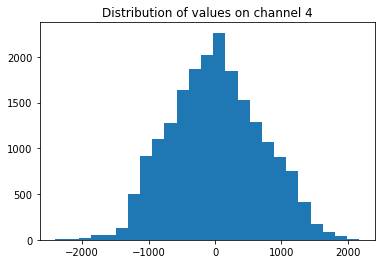

In [12]:
plt.hist(dat[4,:],bins=25)
plt.title("Distribution of values on channel 4")
plt.show()

* For each channel, remove the mean from every data point.

This can be solved with broadcasting. We get the 8 means (one per channel), and for each channel, we remove its respective mean from the row.

In [12]:
dat.shape, dat.mean(axis=1).shape

((8, 20000), (8,))

Given the shape of our 2 arrays above, can we use broadcasting to remove the mean from each individual channel?

Do you remember how to determine if two arrays are compatible for broadcasting?

In [13]:
dat-dat.mean(axis=1)

ValueError: operands could not be broadcast together with shapes (8,20000) (8,) 

We need to make the 2 arrays compatible for broadcasting first.

In [14]:
myMeans = np.expand_dims(dat.mean(axis=1),1)
myMeans.shape

(8, 1)

In [15]:
zeroed_dat = dat-np.expand_dims(dat.mean(axis=1),1)

In [17]:
zeroed_dat.mean(axis=1)

array([-1.10594556e-13, -1.16415322e-14,  1.74622983e-14,  0.00000000e+00,
       -3.49245965e-14, -5.23868948e-14,  1.01863407e-13,  3.78349796e-14])

# Filtering exercises

In [ ]:
filtDat = np.empty_like(dat)
for chan in range(dat.shape[0]):
    filtDat[chan,:] = sosfiltfilt(myFilter, dat[chan,:])
filtDat.shape

Luckily, the sosfiltfilt() function can take 2D arrays as input, so we can filter 8 channels with one line.

In [18]:
y = sosfiltfilt(myFilter, dat) # the sosfilt() function can take a 2D array and will filter every row separately
y.shape # y now contains our 8 channels

NameError: name 'sosfiltfilt' is not defined

# Detection

Calcluate the mean and standard deviation of 1 channel

In [ ]:
chan=3 # select a channel to work with
mean=y[chan,:].mean()
std=y[chan,:].std()
print("mean:",mean)
print("std:",std)

Calculate the detection threshold

In [ ]:
z=5 # 5 std below the mean
threshold = mean-std*z
print("threshold:",threshold)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dat[chan,:],label="Raw data",c="gray", alpha=0.2)
plt.plot(y[chan,:],label="Filtered data")
plt.plot([0,y.shape[1]],[mean,mean], label="Mean")
plt.plot([0,y.shape[1]],[threshold,threshold], label="Spike detection threshold")
plt.legend()
#fn = "../images/spikeDetection.png" # You can save a png file with the plot.
#plt.savefig(fn)
plt.show()

Prompt for LLM: `I am working on a Python project in which analyze data in time series. I would like to detect the local peaks in these time series. Is there a well-tested function I can use to achieve this?  Can you show me how to use this function and what are the main arguments of the function?`


We can use [scipy.signal.find_peaks()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) to detect local peaks in our signal.

This function is looking for peaks, not for troughs (negative peaks). We therefore first need to invert our signal so that the spikes have positive peaks.

In [ ]:
z=5 # we want spikes to be at least 5 standard deviation from the mean

# We can use Numpy mean, std to calculate the mean of each channel without a for loop
means=y.mean(axis=1)
stds=y.std(axis=1)
thresholds = means-stds*z

# We need to copy our filtered data 
yDetect = y.copy() # use a copy of the data to avoid destroying it during the manipulation

# Inverse the polarity of the signal, spikes are going up
yDetect = 0 - yDetect

# Create an empty list to store the spikes detected on each channel
spikeTimesList = [] 

# loop to detect the spikes on each channel
for i in range(dat.shape[0]):
    spikeTimes, _ = find_peaks(x=yDetect[i,:],height=0-thresholds[i]) # the function returs 2 values, we want the first one
    spikeTimesList.append(spikeTimes)
    print("Detection chan {}, {} spikes".format(i,spikeTimes.shape[0]))

### Get the waveform of spikes

In [ ]:
st = spikeTimes[0]
print("st:", st)
start_index=int(st-samplesPerSpike/2)
end_index=int(st+samplesPerSpike/2)
print("start_index:",start_index,"end_index:",end_index)
print("shape of one waveform in waveform array:",waveforms[:,:,0].shape)
print("shape of one waveform in y data:", y[:,start_index:end_index].shape)
waveforms[:,:,0] = y[:,start_index:end_index]

## Get familiar with new array

In [1]:
print("dtype:",dat.dtype)
print("shape:",dat.shape)
print("number of elements(size):",dat.size)
print("size in bytes:",dat.nbytes)
print("size in mB:",dat.nbytes/1000000)
print("seconds:",dat.shape[1]/fs)

NameError: name 'dat' is not defined

## Extract waveforms

In [22]:
st = spikeTimes[0]

In [23]:
start_index=int(st-samplesPerSpike/2)
end_index=int(st+samplesPerSpike/2)
waveform = y[:,start_index:end_index]

In [ ]:
waveforms = np.empty(dat.shape[0],samplesPerSpikes,spikeTimes.shape[0])
for i,st in enumerate(spikeTimes):
    start_index=int(st-samplesPerSpike/2)
    end_index=int(st+samplesPerSpike/2)
    waveforms[:,:,i] = y[:,start_index:end_index]

In [ ]:
waveforms = np.empty((dat.shape[0],samplesPerSpike,spikeTimes.shape[0]))
for i,st in enumerate(spikeTimes):
    start_index=int(st-samplesPerSpike/2)
    end_index=int(st+samplesPerSpike/2)
    waveforms[:,:,i] = y[:,start_index:end_index]

plt.imshow(waveforms[:,:,0]) #first waveform (2D array)
plt.xlabel("Time (samples)")
plt.ylabel("channels")
fn="../images/OneWaveform.pdf"
plt.savefig(fn)

As always, plot your results to make sure it looks like you expect.

In [ ]:
plt.imshow(waveform[:,:]) #first waveform (2D array)
plt.xlabel("Time (samples)")
plt.ylabel("channels")
fn="../images/OneWaveform.pdf"
plt.savefig(fn)

In [ ]:
wf = waveform.reshape((40*8,1))
plt.xlabel("Features")
plt.imshow(wf.T,aspect=10,extent=[0,40*8,0,1],interpolation="None")
fn="../images/OneWaveformFeatures.pdf"
plt.savefig(fn)

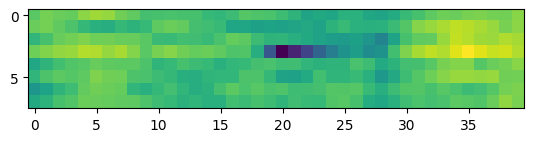

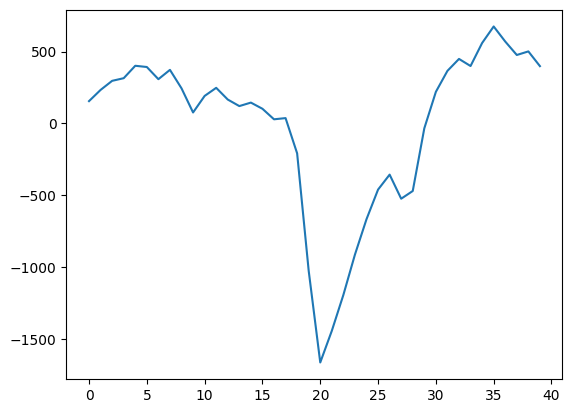

In [25]:
plt.imshow(waveform[:,:]) #first waveform (2D array)
plt.show()
plt.plot(waveform[3,:]) # first waveform, 4th channel (1D array)
plt.show()

In [ ]:
waveforms = np.empty(y.shape[0],40,spikeTimes.shape[0])

In [ ]:
for i,st in enumerate(spikeTimes):
    start_index=int(st-samplesPerSpike/2)
    end_index=int(st+samplesPerSpike/2)
    waveforms[:,:,i] = y[:,start_index:end_index]

### From PCA to waveforms

In [138]:
Xinv = pca.inverse_transform(Xt)
print(Xinv.shape)

(1134, 320)

In [139]:
Xinv = Xinv.reshape((Xinv.shape[0],8,-1))
print(Xinv.shape)

(1134, 8, 40)

In [141]:
Xinv = Xinv.transpose(1,2,0)
print(Xinv.shape)

## Clustering extra

In [42]:
# plot mean waveforms one cluster
clu = 0
clusterIndices = kmeans.labels_==clu
print("clusterIndices.shape:", clusterIndices.shape)
print("clusterIndices.sum():", clusterIndices.sum())

clusterIndices.shape: (1134,)
clusterIndices.sum(): 375


waveforms.shape: (8, 40, 1134)
selWaveforms.shape: (8, 40, 375)


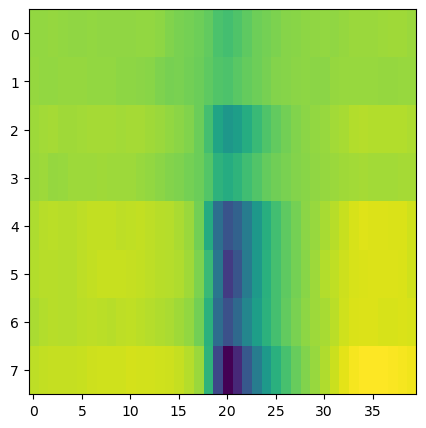

In [43]:
print("waveforms.shape:",waveforms.shape)
selWaveforms = waveforms[:,:,clusterIndices]
print("selWaveforms.shape:",selWaveforms.shape)
plt.figure(figsize=(5,5))
plt.imshow(selWaveforms.mean(axis=2),aspect="auto")

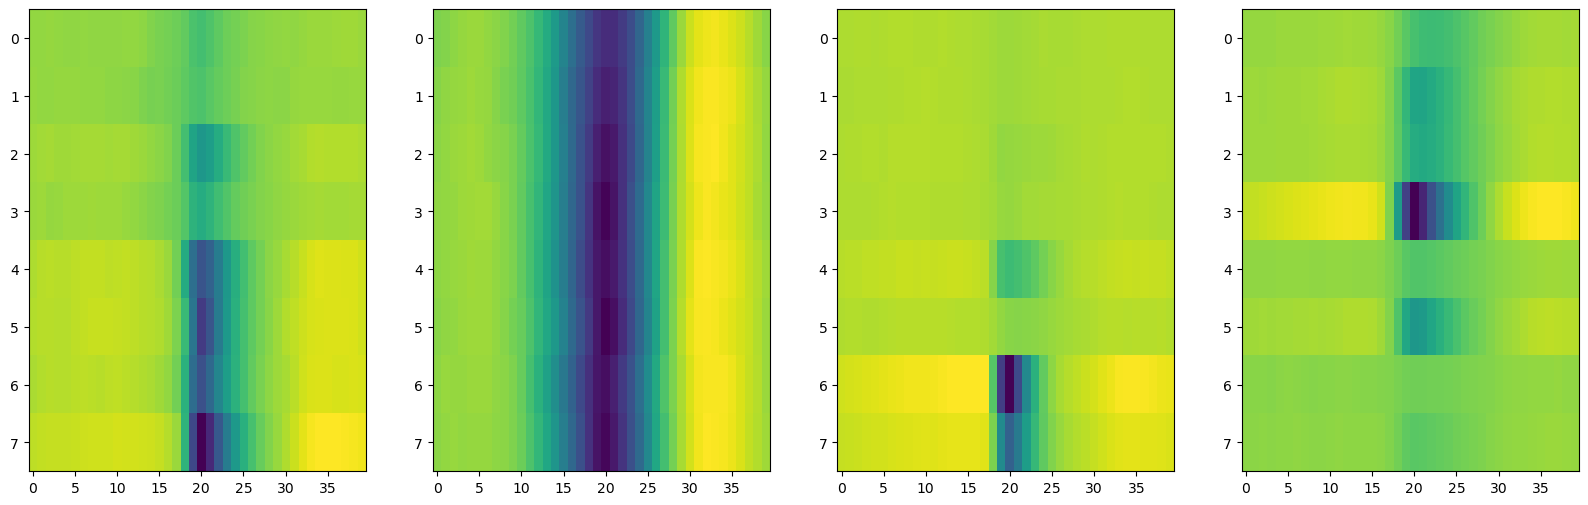

In [41]:
# plot mean waveforms all clusters
nClu = np.unique(kmeans.labels_).shape[0]
fig, ax = plt.subplots(1,nClu,figsize=(20,6))

for i, clu in enumerate(np.unique(kmeans.labels_)):
    clusterIndices = kmeans.labels_==clu
    w = waveforms[:,:,clusterIndices].mean(axis=2)
    ax[i].imshow(w,aspect="auto")

# Summary

After this week, you should 

* Be able to write functions in Python.
* Have used Scikit-Learn to perform PCA and K-means clustering.
* Understand how to use Principal Component Analysis to reduce the dimensionality of a dataset.
* Have applied a K-Means clustering to a dataset and visualize the resutls.



# More on PCA (optional)

## Reconstruct waveforms from the 15 featues of the PCA

We can also use the 20 features per waveforms we got from the PCA analysis to reconstruct the 320 data points of the waveform. 

This reconstruction of the original waveforms will not be perfect as the components we used did not explained 100% of the variance in the original data, but the results should be very close to the original.

The pca object has an inverse_transform method.

In [52]:
%%time
print("Xt.shape:",Xt.shape)
recoWaveforms = pca.inverse_transform(Xt)
print("recoWaveforms.shape:",recoWaveforms.shape)

Xt.shape: (1134, 20)
recoWaveforms.shape: (1134, 320)
CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 1.25 ms


We can reshape `recoWaveforms` to the dimensions of our original `waveforms` array. We had 8 channels and 40 time points for each spike.

In [54]:
W = recoWaveforms.reshape(recoWaveforms.shape[0],8,-1)
print("W.shape after reshape:", W.shape)
W = W.transpose(1,2,0)
print("W.shape after transpose:",W.shape)

W.shape after reshape: (1134, 8, 40)
W.shape after transpose: (8, 40, 1134)


We can get the mean of each cluster this way.

# Plot mean waveforms

In [ ]:
nClusters=4
fig,ax = plt.subplots(nClusters,1,figsize=(size*nClusters,size), constrained_layout=True)
for i in range(nClusters):
    res = waveforms[:,:,kmeans.labels_==i]
    ax[i].imshow(res.mean(axis=2))
    ax[i].set_title("Cluster {}, {} spikes".format(i,np.sum(kmeans.labels_==i)))